#### Objective:
To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction

Context:
It is common for people who tend to think of their reality as a series of black and white events to suffer from depression. Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.' If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way of thinking may never feel that their reality is “good enough”.

Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism depression adjsimp adjfatal adjdep

Here, "Black and white thinking" is referred as "Simplicity"

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv('Depression.csv')
data.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [3]:
data.sample(5)

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
23,24,0.74118,0.56301,0.66329,0.83522,0.65564,0.76227
19,20,0.38274,0.56301,0.56641,0.55240,0.73050,0.70702
17,18,0.83550,1.18439,0.56641,1.23164,1.67146,0.92942
80,81,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153
27,28,0.57139,0.35589,0.50182,0.75529,0.45561,0.59349


In [4]:
data.tail()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
77,78,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913
78,79,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443
79,80,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452
80,81,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153
81,82,0.98643,1.18439,1.56749,0.97903,1.23973,1.65687


In [5]:
data.shape

(82, 7)

In [6]:
data.isna().sum()

id            0
simplicity    0
fatalism      0
depression    0
adjsimp       0
adjfatal      0
adjdep        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          82 non-null     int64  
 1   simplicity  82 non-null     float64
 2   fatalism    82 non-null     float64
 3   depression  82 non-null     float64
 4   adjsimp     82 non-null     float64
 5   adjfatal    82 non-null     float64
 6   adjdep      82 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.6 KB


In [8]:
data=data.drop('id',1)

In [11]:
from scipy.stats import zscore

In [13]:
scaled_data=data.apply(zscore)

In [26]:
mcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(scaled_data)
    mcss.append(km.inertia_)

E:\Anacondafiles\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Distance')

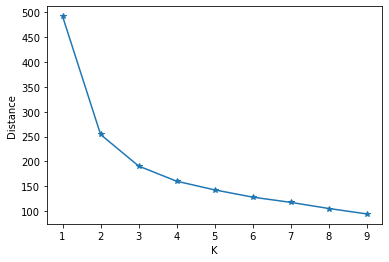

In [22]:
plt.plot(range(1,10),mcss,marker="*")
plt.xlabel('K')
plt.ylabel('Distance')

In [40]:
km=KMeans(3)
km.fit(scaled_data)
silhouette_score(scaled_data,km.labels_)

0.32372520339820604

In [33]:
km=KMeans(4)
km.fit(scaled_data)
silhouette_score(scaled_data,km.labels_)

0.29348714384260627

In [34]:
km=KMeans(5)
km.fit(scaled_data)
silhouette_score(scaled_data,km.labels_)

0.2632952556868625

In [35]:
km=KMeans(6)
km.fit(scaled_data)
silhouette_score(scaled_data,km.labels_)

0.23797539125028677

In [43]:
km=KMeans(3)
km.fit(scaled_data)
labels=km.labels_

In [51]:
data['Groups']=labels

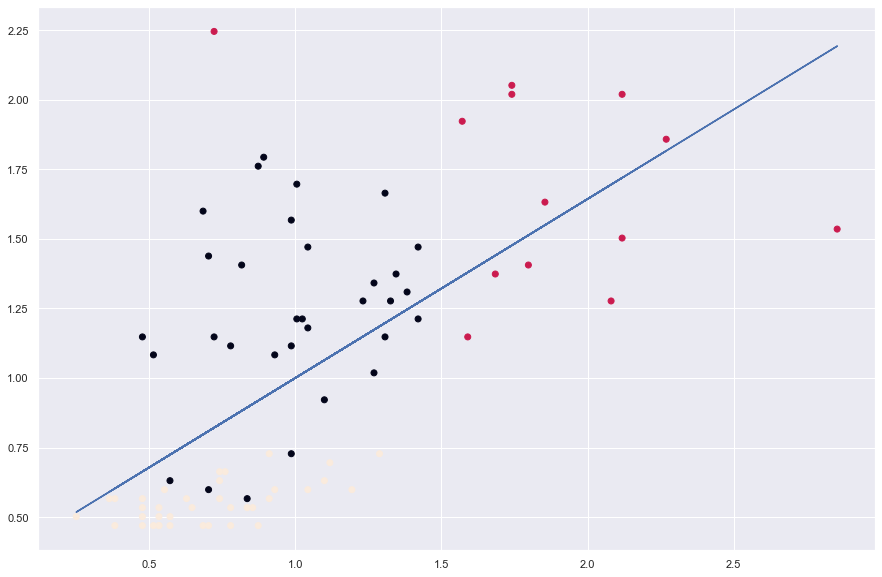

In [63]:
plt.scatter(data['simplicity'],data['depression'],c=data['Groups'])
z=np.polyfit(data['simplicity'],data['depression'],1)
p=np.poly1d(z)
plt.plot(data['simplicity'],p(data['simplicity']))

In [64]:
data

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,Groups
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,2
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,2
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,2
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,2
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,2
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,0
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,1
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,1
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,0


array([[<AxesSubplot:title={'center':'adjdep'}, xlabel='[Groups]'>,
        <AxesSubplot:title={'center':'adjfatal'}, xlabel='[Groups]'>],
       [<AxesSubplot:title={'center':'adjsimp'}, xlabel='[Groups]'>,
        <AxesSubplot:title={'center':'depression'}, xlabel='[Groups]'>],
       [<AxesSubplot:title={'center':'fatalism'}, xlabel='[Groups]'>,
        <AxesSubplot:title={'center':'simplicity'}, xlabel='[Groups]'>]],
      dtype=object)

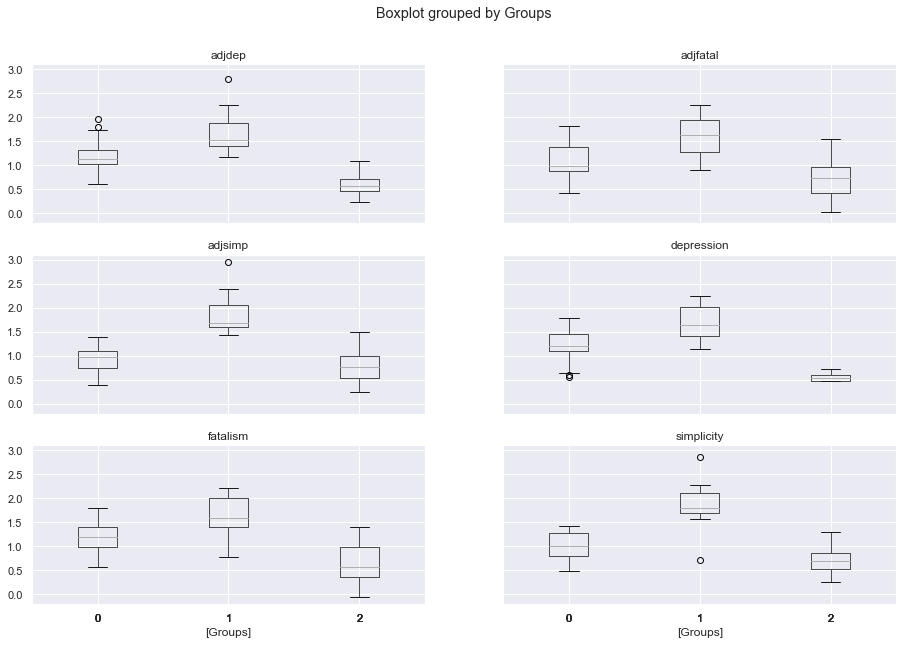

In [60]:
sns.set(rc={'figure.figsize':(15,10)})
data.boxplot(by=['Groups'])

In [ ]:
d